In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
rv_32 = pd.read_csv(r'C:\Users\NT550\asac\eat_the\review_5075632.csv')
rv_60 = pd.read_csv(r'C:\Users\NT550\asac\eat_the\review_1000085960.csv')
rv_25 = pd.read_csv(r'C:\Users\NT550\asac\eat_the\review_1000098225.csv')
rv_77 = pd.read_csv(r'C:\Users\NT550\asac\eat_the\review_1000120077.csv')


In [4]:
rv_32.head()


,Unnamed: 0,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike
0,4431,5075632,베스트,라벤더,[콜린스 다이닝] 건강가득 전복솥밥 키트,맛있어요! 첨엔 좀 비싸다 생각했지만 전복솥밥 만들어먹으니 넘 편하고 전복세개 든거...,2023.02.11,12
1,4432,5075632,베스트,라벤더,[콜린스 다이닝] 건강가득 전복솥밥 키트,도미솥밥 맛있게 잘 먹어서 믿고 전복도 구매해봤는데 역시 잘한 선택 같아요!!\n\...,2022.04.07,30
2,4433,5075632,베스트,퍼플,[콜린스 다이닝] 건강가득 전복솥밥 키트,가을이 되니까 TV에서 전복솥밥을 먹는 장면이 많이 나오더라구요\n맛있게 먹는 걸 ...,2021.12.29,13
3,4434,5075632,라벤더,어**,[콜린스 다이닝] 건강가득 전복솥밥 키트,맛있어요 잘먹고있어요,2023.07.11,0
4,4435,5075632,프렌즈,박**,[콜린스 다이닝] 건강가득 전복솥밥 키트,맛있게 잘 먹었어요~,2023.07.10,0


In [5]:
rvt = pd.concat([rv_32['ReviewText'], rv_60['ReviewText'], rv_25['ReviewText'], rv_77['ReviewText']], axis=0)
rv_t = pd.DataFrame(rvt)
rv_t.head()

,ReviewText
0,맛있어요! 첨엔 좀 비싸다 생각했지만 전복솥밥 만들어먹으니 넘 편하고 전복세개 든거...
1,도미솥밥 맛있게 잘 먹어서 믿고 전복도 구매해봤는데 역시 잘한 선택 같아요!!\n\...
2,가을이 되니까 TV에서 전복솥밥을 먹는 장면이 많이 나오더라구요\n맛있게 먹는 걸 ...
3,맛있어요 잘먹고있어요
4,맛있게 잘 먹었어요~


In [6]:
train_dic = pd.read_excel(r'C:\Users\NT550\asac\eat_the\감성분석_가중치.xlsx')

In [7]:
train_dic.head()

,일련번호,단어,감성분석,가중치
0,1,126,긍정,1
1,2,13월의 월급,긍정,1
2,3,1가구 1주택,중립,0
3,4,1세대,중립,0
4,5,1세대 1주택,긍정,1


In [8]:
type(rv_t)

pandas.core.frame.DataFrame

In [9]:
train_dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47651 entries, 0 to 47650
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일련번호    47651 non-null  int64 
 1   단어      47651 non-null  object
 2   감성분석    47651 non-null  object
 3   가중치     47651 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


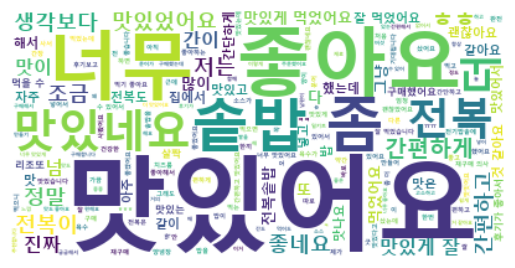

In [10]:
import matplotlib.font_manager as fm
# 워드클라우드 시각화
# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
# 리뷰 텍스트 결합
text = ' '.join(rv_t['ReviewText'])

# 한글 폰트 경로 설정
font_path = r'C:\Users\82103\sih\eat_the\맑은고딕\malgunbd.ttf'  # 사용하려는 한글 폰트 파일(.ttf)의 경로로 수정해주세요.

# 워드클라우드 생성
wordcloud = WordCloud(background_color='white', font_path=font_path).generate(text)

# 한글 폰트 설정
fontprop = fm.FontProperties(fname=font_path)

# 워드클라우드 시각화
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
rv_t['ReviewText'][:5]

0    맛있어요! 첨엔 좀 비싸다 생각했지만 전복솥밥 만들어먹으니 넘 편하고 전복세개 든거...
1    도미솥밥 맛있게 잘 먹어서 믿고 전복도 구매해봤는데 역시 잘한 선택 같아요!!\n\...
2    가을이 되니까 TV에서 전복솥밥을 먹는 장면이 많이 나오더라구요\n맛있게 먹는 걸 ...
3                                          맛있어요 잘먹고있어요
4                                          맛있게 잘 먹었어요~
Name: ReviewText, dtype: object

In [13]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [15]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_test_review = []

for review in rv_t['ReviewText']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_test_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_test_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_test_review[:4]

[['맛있다',
  '첨',
  '엔',
  '좀',
  '비싸다',
  '생각',
  '하다',
  '전복',
  '솥밥',
  '만들다',
  '먹다',
  '넘다',
  '편하다',
  '전복',
  '세',
  '개',
  '들다',
  '육',
  '맛',
  '보다',
  '오히려',
  '가성',
  '비',
  '키트',
  '라는',
  '생각',
  '드네',
  '요',
  '강추',
  '특히',
  '조선',
  '향',
  '밉다',
  '쌀',
  '구수하다',
  '맛',
  '과',
  '찰',
  '진식',
  '감',
  '넘다',
  '잘',
  '어울리다',
  '인용',
  '무',
  '쎄다',
  '무쇠',
  '솥',
  '에',
  '딱',
  '지다',
  '먹다',
  '꿀맛',
  '너무',
  '맛있다',
  '눈물나다',
  '뻔',
  '양념',
  '간장',
  '필요없다',
  '간간',
  '맛',
  '좋다',
  '평소',
  '간',
  '세다',
  '좋아하다',
  '심',
  '다시마',
  '간장',
  '같다',
  '조금',
  '곁들이다',
  '굿',
  '들기름',
  '바퀴',
  '두르다',
  '또다른',
  '맛',
  '마무리',
  '누룽지',
  '까지',
  '남편',
  '행복',
  '평소',
  '소식',
  '하다',
  '공기',
  '로',
  '세',
  '그릇',
  '들다',
  '저',
  '를',
  '보고',
  '배',
  '를',
  '내미다',
  '책임',
  '지르다',
  'ㅋ',
  '어쩌라구',
  '요',
  '솥밥',
  '넘다',
  '맛',
  '난',
  '걸',
  '정말',
  '오랜',
  '만',
  '에',
  '맛',
  '난',
  '밥',
  '먹다',
  '해주다',
  '무쇠',
  '솥',
  '업체',
  '쌀',
  '생산',
  '농부',
  '님',
  '콜린스',
  '다이닝',
  '과',

In [17]:
# 학습데이터 리뷰로 단어 사전을 생성하여 리뷰데이터를 인덱스로 바꾸어 주도록 하겠습니다.
# 라벨데이터(긍정, 분석 감정데이터, 정답 데이터)는 벡터화

# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dic)
train_sequences = tokenizer.texts_to_sequences(train_dic)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_dic['가중치'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(rv_t['ReviewText'])

In [18]:
DEFAULT_PATH  = '/content/sample_data/' # 경로지정
DATA_PATH = 'CLEAN_DATA/' #.npy파일 저장 경로지정
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

In [19]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

#전처리 데이터 불러오기
DATA_PATH = '/content/sample_data/CLEAN_DATA/'
DATA_OUT = '/content/sample_data/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

In [20]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

In [21]:
class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))
    

  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [24]:
from tensorflow.keras.models import save_model

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name +'\weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])
# 모델 저장하기
save_model(model,r'C:\Users\NT550\asac\eat_the\모델 저장할 폴더 경로')

/content/sample_data/DATA_OUT/cnn_classifier_kr -- Folder already exists 

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.3333
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /content/sample_data/DATA_OUT/cnn_classifier_kr\weights.h5
1/1 [==============================] - 1s 1s/step - loss: 0.6938 - accuracy: 0.3333 - val_loss: 0.7454 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.6667
Epoch 2: val_accuracy did not improve from 0.00000
1/1 [==============================] - 0s 32ms/step - loss: 0.6727 - accuracy: 0.6667 - val_loss: 0.8024 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 0.6506 - accuracy: 0.6667
Epoch 3: val_accuracy did not improve from 0.00000
1/1 [==============================] - 0s 30ms/step - loss: 0.6506 - accuracy: 0.6667 - val_loss: 0.8494 - val_accuracy: 0.0000e+00


FailedPreconditionError: C:\Users\NT550\asac\eat_the\모델 저장할 폴더 경로\variables is not a directory

In [25]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights('모델저장위치/weights.h5')
model.evaluate(test_input, test_label_data)

ValueError: Object arrays cannot be loaded when allow_pickle=False